# Linear Regression VS Decision Tree Regression
In this notebook, we will analyze the difference between Linear Regression and Decision Tree Regression on a sample dataset and which algorithm will work better.

In [496]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression 
import numpy as np
%matplotlib inline

In [497]:
# read the dataset
bmidata = pd.read_csv('https://raw.githubusercontent.com/dnimm/IquestMLtask/main/bmi_and_life_expectancy.csv')

bmidata.head()


,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


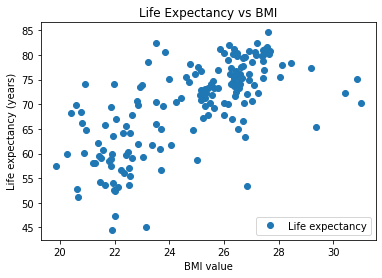

In [498]:
# Plotting the data into a scatter plot
bmidata.plot(x='BMI', y='Life expectancy', style='o')


plt.title('Life Expectancy vs BMI')
plt.xlabel('BMI value')
plt.ylabel('Life expectancy (years)')
plt.show()

In [499]:
X = bmidata[['BMI']]
y = bmidata['Life expectancy']

In [500]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# split the dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression

In [501]:
regressor = LinearRegression()
# training the algorithm
regressor.fit(X_train, y_train) 

LinearRegression()

In [502]:
# To retrieve the intercept
print(regressor.intercept_)

2.013592357356714


In [503]:
# For retrieving the slope
print(regressor.coef_)

[2.73059008]


In [504]:
y_pred = regressor.predict(X_test)



In [505]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
160,74.10,59.127434
149,77.80,74.930478
73,80.60,76.098624
7,80.40,74.285239
100,73.30,72.003586
54,71.80,71.778585
125,63.50,61.888415
44,73.70,74.012453
26,80.80,76.974024
90,78.50,65.417648


In [506]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.951821428518988
Mean Squared Error: 46.54144257320054
Root Mean Squared Error: 6.822128888638835


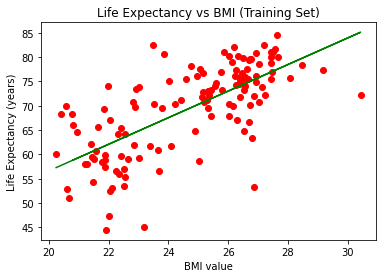

In [507]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title('Life Expectancy vs BMI (Training Set)')
plt.xlabel('BMI value')
plt.ylabel('Life Expectancy (years)')
plt.show()

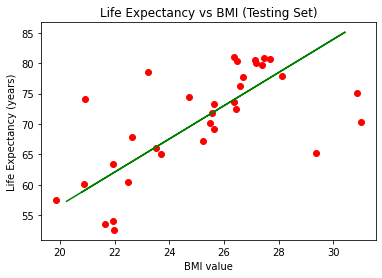

In [508]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title('Life Expectancy vs BMI (Testing Set)')
plt.xlabel('BMI value')
plt.ylabel('Life Expectancy (years)')
plt.show()


# Decision Tree Regression


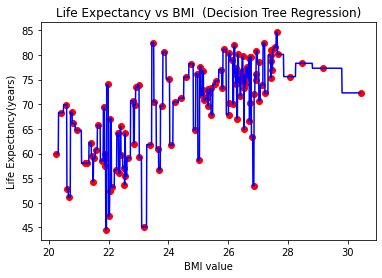

     Actual  Predicted
160   74.10  59.839289
149   77.80  74.549117
73    80.60  75.636454
7     80.40  73.948514
100   73.30  71.824700
54    71.80  71.615264
125   63.50  62.409272
44    73.70  73.694599
26    80.80  76.451295
90    78.50  65.694362
136   70.20  71.486782
94    67.90  64.177072
131   52.60  62.515363
80    72.40  73.921877
62    53.60  61.687304
119   77.90  78.177818
37    76.20  74.276088
154   79.70  76.299785
101   54.00  62.429428
142   60.40  63.808450
51    75.11  85.132249
138   81.10  73.716915
33    57.50  57.172086
45    60.10  59.759963
146   70.30  85.457866
8     69.20  71.873882
150   67.20  70.849045
89    74.50  69.534303
92    80.70  77.039723
124   66.00  66.437604
63    65.00  66.875589
55    80.00  75.721804
93    65.30  81.334577
Mean Absolute Error: 4.897491788945177
Mean Squared Error: 44.504084708066024
Root Mean Squared Error: 6.671138186851328


In [509]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
r = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
r.fit(X_train.values, y_train)
y_p = model.predict(X_test)
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values

X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X_train, y_train, color = 'red')

# plot predicted data
plt.plot(X_grid, r.predict(X_grid), color = 'blue')

# specify title
plt.title('Life Expectancy vs BMI  (Decision Tree Regression)')

# specify X axis label
plt.xlabel('BMI value')

# specify Y axis label
plt.ylabel('Life Expectancy(years)')

# show the plot
plt.show()


# Compares the actual values versus the values predicted by the model
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(d)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_p))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))


# Which Algorithm is the best?
Decision Tree Regression is a better algorithm than the Linear Regression algorithm because the mean absolute error, mean square error, and the root mean squared error are all lower in value than the evaluation values in the linear regression algorithm. All the metrics above measures the average model prediction error ranging between 0 to infinity with negatively oriented scores which means lower the evaluation value better is the model.